In [7]:
import numpy as np

# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

# para cómputo simbólico
from sympy import *

# configuramos los símbolos alfa, beta, x y f para su uso en sympy
alpha, beta, x = symbols('alpha beta x')
g = symbols('g', cls=Function)
init_printing()

# importamos slider para experimentos interactivos
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


def cobweb(f, x, y):
    """
    Dibuja un diagrama de telaraña para una función.
    """
    plt.axhline(linewidth=1.0, color="black")
    plt.axvline(linewidth=1.0, color="black")
    plt.ylim((y.min(),y.max()))
    indep = np.linspace(x.min(), x.max(), len(x))
        
    # grafica la funcion 
    plt.plot(indep,f(indep),'blue')
        
    # grafica la diagonal
    plt.plot(indep, indep, 'black')

    # grafica la telaraña
    y0 = f(x[0])
    x0 = x[0]
    for i in range(len(x)):
        plt.hlines(y0, x0, y0,'r')
        x0 = y0
        y0 = f(x0)
        plt.vlines(x0, x0, y0,'r')

Se propone la siguiente ecuación como modelo de densidad de poblaciones de insectos en años sucesivos.

$$x_{t+1}=\alpha x_{t}exp(-\beta x_{t}^3)$$

Siendo $\alpha$ y $\beta$ números positivos y $x_{t}\ge0$.

In [2]:
def f(x, alpha, beta):
    return alpha*x*np.exp(-beta*x**3)

<function __main__.plot_f>

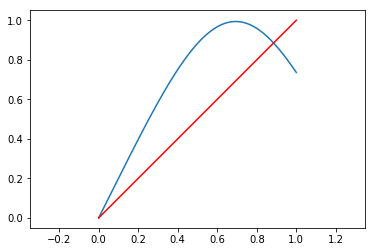

In [6]:

def plot_f(x, alpha, beta):
    y = np.linspace(x[0],x[1],300)
    f_y = f(y, alpha, beta)
    fig1 = plt.plot(y, f_y)
    fig1 = plt.plot(y, y, color='red')
    plt.axis('equal')

interact(plot_f,
         x=widgets.FloatRangeSlider(min=0, max=2, step=0.01,
                                    value=[0,1], continuous_update=False),
         alpha=widgets.IntSlider(min=0,max=30, step=1, 
                                 value=2,
                                 continuous_update=False),
         beta=widgets.IntSlider(min=0, max=30, step=1,
                                value=1, continuous_update=False))

<function __main__.plot_cobg>

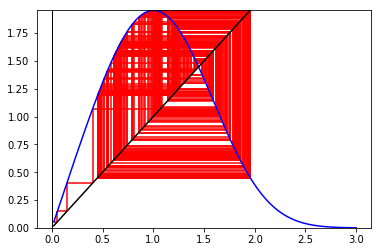

In [4]:
def plot_cobg(x, alpha, beta):  
    y = np.linspace(x[0],x[1],300)
    g_y = f(y, alpha, beta)
    cobweb(lambda x: f(x, alpha, beta), y, g_y)

# configura gráfica interactiva
interact(plot_cobg,
         x=widgets.FloatRangeSlider(min=0.01, max=3, step=0.01,
                                    value=[0.02, 3],
                                    continuous_update=False),
         alpha=widgets.FloatSlider(min=0.001, max=30,step=0.01,
                                   value=np.e, continuous_update=False),
         beta=widgets.FloatSlider(min=0.001, max=30,step=0.01,
                                  value=0.33, continuous_update=False))

In [30]:
f0 = 2.72*x*exp(-0.33*x**3)
Eq(g(x),f0)

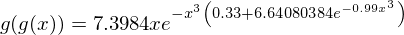

In [31]:
f1 = simplify(f0.subs(x, f0))
Eq(g(g(x)),f1)

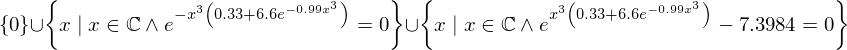

In [32]:
f1_ = 7.3984*x*exp(-x**3*(0.33+6.6*exp(-0.99*x**3)))
solveset(Eq(f1_,x),x)

<function __main__.plot_f>

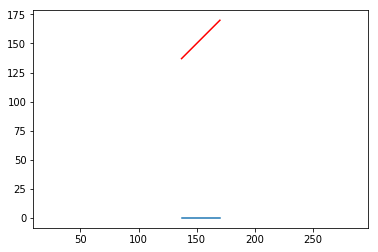

In [26]:

def plot_f(x, alpha, beta):
    y = np.linspace(x[0],x[1],300)
    f_y = f(y, alpha, beta)
    fig1 = plt.plot(y, f_y)
    fig1 = plt.plot(y, y, color='red')
    plt.axis('equal')

interact(plot_f,
         x=widgets.FloatRangeSlider(min=0, max=200, step=0.01,
                                    value=[137,170], continuous_update=False),
         alpha=widgets.IntSlider(min=0,max=30, step=1,
                                 value=30,
                                 continuous_update=False),
         beta=widgets.IntSlider(min=0, max=30, step=1,
                                value=1, 
                                continuous_update=False))